# Logistic Regression

## Logistic Regression 모델
> **`Logistic Regression`** 은 **분류**를 위한 **지도학습** 머신러닝 모델이다.  
**종속변수가 이진형 분포**를 보일경우 기존 선형모델로는 해결이 어려움이 있음.  
클래스가 여러개인 분류문제에도 사용이 가능하지만 이진형 데이터(바이너리) 종속변수 분류문제를 해결하는데 주로 사용.  
ex) 남/여, 개/고양이, OK/NG, 햄메일/스팸메일, 승인/반려

<img src="https://drive.google.com/uc?id=10GmOoYLDCvGf7atGImyfyuyeZg2qbU72">

위 그림에서 확인 할 수 있듯 기존 선형모델이 풀기 어려운 이진분류 문제를 해결하고자 선형을 비선형으로 변환한 모델이다.  
만약 모델(함수)의 출력결과를 0과 1사이로 만들어 줄 수 있다면 즉, 확률 문제로서 접근한다면 분류문제에 사용 가능 하겠다는 아이디어에서 변형 되었다.

## Odds (승산비)
- 로지스틱회귀 모델을 확률로서 접근하는데 가장 핵심적인 개념  
  
$$ p : 어떤\ 일이\ 발생할\ 확률\ (승산) $$  
$$ Odds = {p \over {1-p}} : \  어떤\ 일이\ 발생할\ 확률\ / 발생하지\ 않을\ 확률\ (승산비)$$  

> 0 < p < 1  
0 < 1-p < 1  
p가 0에 가까울 경우 0  
p가 1에 가까울 경우 무한대  
  
위의 Odds를 그대로 사용하지 않고 log를 취해 사용하면 0을 기준으로 상호대칭적이며, 계산이 수월한 수식이 완성 됩니다.  
기존 선형회귀식에서 y위치에 log Odds를 적용하면 아래와 같은 식이 되고  
  
$$ log({Y \over {1-Y}}) = \beta_0 + \beta_1x$$  
  
이를 다시 y에 대해 정리하면 sigmoid 식이 됩니다.  
  
$$ y = {1 \over {1+\exp^{-(\beta_0 + \beta_1x)}}} $$  

<img src="https://drive.google.com/uc?id=1Es8gzBJUKirvRLUc17qXdHCrNLX0gghx">

결국 로지스틱 회귀 모델도 $\beta_0$와 $\beta_1$ 를 추정하게 됩니다.
> 0 < sigmoid(x) < 1  
sigmoid(0) = 0.5  
곧 시그모이드 함수를 거친 값을 확률값처럼 생각이 가능해짐

## 모델학습

### cost function

$$ \hat{y} = \begin{cases} 1 & \text{ if } \ h(x) \geq 0.5 \\ 0 & \text{ if } \ h(x) < 0.5 \end{cases} $$

로지스틱 회귀모델의 비용함수는 각 가정에 따른 y의 결과값에 따라 서로 다른 함수를 갖게 됩니다.

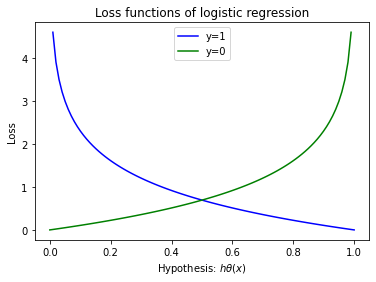

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

x = np.linspace(0, 1, 100)
y1 = 0 - np.log(x)
y0 = 0 - np.log(1 - x)

plt.plot(x, y1, 'b', label='y=1')
plt.plot(x, y0, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss')
plt.legend()
plt.show()

이를 방정식으로 풀어내면 하나의 식으로 정리가 됩니다.

$$ cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x)) $$

$$ J(\theta)= \dfrac{1}{N} \sum_{i=1}^N[-y^ilog(h(x^i)) - (1-y^i)log(1-h(x^i))] $$

$$ \dfrac{\partial{J(\theta)}}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^N (h(x^i) - y^i)x_j^i$$

## 모델평가
> 예측모델인 **`linear regression`** 모델의 경우 최소자승법을 통해 모델을 평가하였다.  
분류모델인 **`logistic regression`** 모델은 분류모델 평가 지표를 사용하여 모델을 평가한다.  
대표적인 모델평가 함수인 **오차행렬(confusion matrix)** 와 **분류평가표(classification report)** 를 사용한다.

### 오차행렬(confusion matrix)
<img src="https://drive.google.com/uc?id=1I4gkLs1Kji1UCseSU6rsxfi8Sp5Q0MOe">  

TP - True Positive(실제값 1, 예측값 1로 정분류 된 갯수)  
FN - False Negative(실제값 1, 예측값 0으로 오분류 된 갯수)  
FP - Flase Positive(실제값 0, 예측값 1로 오분류 된 갯수)  
TN - True Negative(실제값 0, 예측값 0으로 정분류 된 갯수)

### 정확도(Accuracy) - 전체 샘플 중 모델이 바르게 분류한 비율
<img src="https://drive.google.com/uc?id=1veqNRPag_-PkvGWxDc-1ZPh20L4q9CNB">  

$${TP + TN \over TP + FN + FP + TN}$$

### 정밀도(Precision) - 모델이 positive로 분류한 것 중 실제값이 positive이 비율
<img src="https://drive.google.com/uc?id=1_JVlZ1KGklpCQF_uiZnp4Wli7leJdPvK">  

$${TP \over TP + FP}$$

### 재현율(Recall) - 실제값이 positive인 것 중 모델이 positive라 분류한 비율
<img src="https://drive.google.com/uc?id=1dkUFhBtLyivJayOOppjUsU07a10Rh0Fi">  

$${TP \over TP + FN}$$

### f1-score - precision과 recall의 조화평균
<img src="https://drive.google.com/uc?id=1tB56v7-P5S5_sFOcxrzEthq3-qyDB7hH">    

$${2 * precision * recall \over precision + recall}$$  

## 로지스틱회귀 실습

In [1]:
# 필요모듈 import

# sklearn 유방암 데이터셋 활용


In [2]:
# 데이터 로드


In [ ]:
# 로딩 데이터 확인


In [ ]:
# 데이터프레임 제작


In [4]:
# 데이터 분할

# 훈련과 테스트셋에서의 레이블의 분포가 동일하게 하라. (stratify=label)


In [7]:
# 모델 import


In [8]:
# 모델 생성


<img src="https://drive.google.com/uc?id=1qWctLCSnb-gCVbr0jq-jp318bEaAWn2u">

In [ ]:
# 모델 훈련


In [ ]:
# 모델 예측


In [ ]:
# 예측 확률값 확인


In [ ]:
# 모델 평가


In [ ]:
# 오분류 보고서 출력
